In [2]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [57]:
#read file for base df from john hopkins
hopkins_df = pd.read_csv("08-01-2020 covid data.csv")
hopkins_df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-08-02 04:35:05,32.3182,-86.9023,89349,1603,35401.0,52345.0,1,1822.264508,697371.0,10521.0,1.794088,84000001,USA,14222.816394,11.775174
1,Alaska,US,2020-08-02 04:35:05,61.3707,-152.4044,3136,24,930.0,2182.0,2,428.681763,238633.0,NaN,0.765306,84000002,USA,32620.412962,NaN
2,American Samoa,US,2020-08-02 04:35:05,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,1267.0,NaN,NaN,16,ASM,2277.097824,NaN
3,Arizona,US,2020-08-02 04:35:05,33.7298,-111.4312,177002,3747,23064.0,150191.0,4,2431.774721,948650.0,11346.0,2.116925,84000004,USA,13033.203516,6.410097
4,Arkansas,US,2020-08-02 04:35:05,34.9697,-92.3731,43173,458,36034.0,6681.0,5,1430.609808,514581.0,2852.0,1.060848,84000005,USA,17051.505002,6.605981


In [60]:
#only the states necessary to compare to alc dataset
hopkins_df.drop(index=[0,2,3,5,8,9,10,12,13,14,15,16,18,19,23,24,26,27,28,30,31,32,33,34,35,36,37,39,40,41,43,44,45,46,47,48,50,51,52,54,55,57])

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
1,Alaska,US,2020-08-02 04:35:05,61.3707,-152.4044,3136,24,930.0,2182.0,2,428.681763,238633.0,NaN,0.765306,84000002,USA,32620.412962,NaN
4,Arkansas,US,2020-08-02 04:35:05,34.9697,-92.3731,43173,458,36034.0,6681.0,5,1430.609808,514581.0,2852.0,1.060848,84000005,USA,17051.505002,6.605981
6,Colorado,US,2020-08-02 04:35:05,39.0598,-105.3111,47249,1844,5334.0,40071.0,8,820.475188,533403.0,6441.0,3.902728,84000008,USA,9262.501354,13.632035
7,Connecticut,US,2020-08-02 04:35:05,41.5978,-72.7554,49810,4432,8613.0,36765.0,9,1397.082479,793996.0,10807.0,8.897812,84000009,USA,22270.184700,21.696446
11,Florida,US,2020-08-02 04:35:05,27.7663,-81.6868,480028,7022,NaN,473006.0,12,2235.002691,3679443.0,27344.0,1.462831,84000012,USA,17131.427766,5.696334
17,Illinois,US,2020-08-02 04:35:05,40.3495,-88.9861,181754,7700,NaN,174054.0,17,1434.316346,2740658.0,NaN,4.236495,84000017,USA,21627.972807,NaN
20,Kansas,US,2020-08-02 04:35:05,38.5266,-96.7265,27592,358,1178.0,26056.0,20,947.100107,292507.0,1751.0,1.297478,84000020,USA,10040.352671,6.346042
21,Kentucky,US,2020-08-02 04:35:05,37.6681,-84.6701,30723,740,8135.0,21848.0,21,687.673426,596674.0,3782.0,2.408619,84000021,USA,13355.364191,12.309996
22,Louisiana,US,2020-08-02 04:35:05,31.1695,-91.8678,116280,3949,74246.0,38085.0,22,2501.293884,1342243.0,NaN,3.396113,84000022,USA,28872.929194,NaN
25,Massachusetts,US,2020-08-02 04:35:05,42.2302,-71.5301,118040,8626,97595.0,11819.0,25,1712.585399,1188430.0,11908.0,7.307692,84000025,USA,17242.357385,10.088106


In [82]:
#read alcohol sales file from niaaa
alc_sales_df = pd.read_csv("alcsales_July2020.csv")

#converting the FIPS column to string as those numbers are labels for states not integers
alc_sales_df['FIPS'] = alc_sales_df['FIPS'].apply(str)

alc_sales_df.set_index('FIPS')

#display dataframe
#alc_sales_df.head()

,Year,Month,Beverage,Gallons,Ethanol,Population,PerCapita
FIPS,,,,,,,
2,2017,1,1,103645,42598,593378,0.0718
5,2017,1,1,402885,165586,2455022,0.0674
8,2017,1,1,733857,301615,4634346,0.0651
9,2017,1,1,412100,169373,3015481,0.0562
12,2017,1,1,2770686,1138752,17722275,0.0643
...,...,...,...,...,...,...,...
25,2020,7,3,11251830,506332,5862386,0.0864
29,2020,7,3,12167060,547518,5077875,0.1078
38,2020,7,3,2108602,94887,617880,0.1536


In [83]:
#year 2017 df
df17 = alc_sales_df[(alc_sales_df.Year == 2017) & (alc_sales_df.Month <= 7)]

#display dataframe
df17

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita
0,2017,1,2,1,103645,42598,593378,0.0718
1,2017,1,5,1,402885,165586,2455022,0.0674
2,2017,1,8,1,733857,301615,4634346,0.0651
3,2017,1,9,1,412100,169373,3015481,0.0562
4,2017,1,12,1,2770686,1138752,17722275,0.0643
...,...,...,...,...,...,...,...,...
324,2017,7,38,3,1857034,83567,613251,0.1363
325,2017,7,41,3,9756756,439054,3468412,0.1266
326,2017,7,47,3,11962115,538295,5545920,0.0971
327,2017,7,48,3,60231134,2710401,22572383,0.1201


Text(0.5, 1.0, 'Gallons of Ethanol Per Capita 2017')

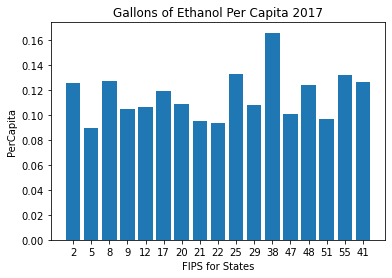

In [88]:
#bar chart for gallons of ethanol per state
plt.bar(df17['FIPS'],df17['PerCapita'])
plt.xlabel("FIPS for States")
plt.ylabel("PerCapita")
plt.title("Gallons of Ethanol Per Capita 2017")

In [85]:
#dataframe for 2018 sales january - july
df18 = alc_sales_df[(alc_sales_df.Year == 2018) & (alc_sales_df.Month <= 7)]

#display dataframe
df18.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita
564,2018,1,2,1,98477,40474,590760,0.0685
565,2018,1,5,1,324055,133187,2465297,0.0540
566,2018,1,8,1,817826,336126,4715895,0.0713
567,2018,1,9,1,450195,185030,3019150,0.0613
568,2018,1,12,1,3030298,1245453,17980787,0.0693


Text(0.5, 1.0, 'Gallons of Ethanol Per Capita 2018')

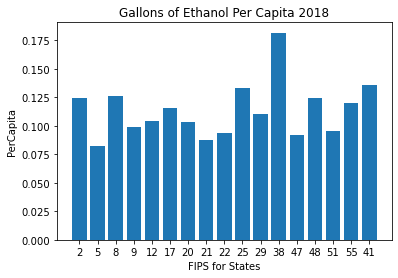

In [101]:
#bar chart for gallons of ethanol per state
plt.bar(df18['FIPS'],df18['PerCapita'])
plt.xlabel("FIPS for States")
plt.ylabel("PerCapita")
plt.title("Gallons of Ethanol Per Capita 2018")

In [15]:
#dataframe for 2018 sales january - june
df19 = alc_sales_df[(alc_sales_df.Year == 2019) & (alc_sales_df.Month <= 7)]

#display dataframe
df19.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita
1128,2019,1,2,1,112835,46375,589481,0.0787
1129,2019,1,5,1,349681,143719,2476087,0.0580
1130,2019,1,8,1,889500,365585,4789291,0.0763
1131,2019,1,9,1,614817,252690,3019188,0.0837
1132,2019,1,12,1,3281500,1348697,18207522,0.0741


Text(0.5, 1.0, 'Gallons of Ethanol Per Capita 2019')

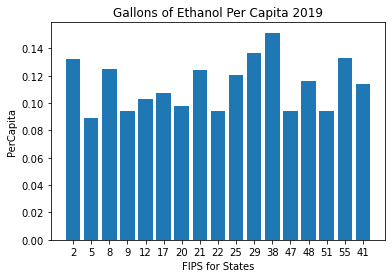

In [102]:
#bar chart for gallons of ethanol per state
plt.bar(df19['FIPS'],df19['PerCapita'])
plt.xlabel("FIPS for States")
plt.ylabel("PerCapita")
plt.title("Gallons of Ethanol Per Capita 2019")

In [16]:
#dataframe for 2020 sales january - june
df20 = alc_sales_df[(alc_sales_df.Year == 2020) & (alc_sales_df.Month <= 7)]

#display dataframe
df20.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita
1692,2020,1,2,1,121885,50095,589481,0.0850
1693,2020,1,5,1,325925,133955,2476087,0.0541
1694,2020,1,8,1,896700,368544,4789291,0.0770
1695,2020,1,9,1,656658,269886,3019188,0.0894
1696,2020,1,12,1,3463591,1423536,18207522,0.0782


Text(0.5, 1.0, 'Gallons of Ethanol Per Capita 2020')

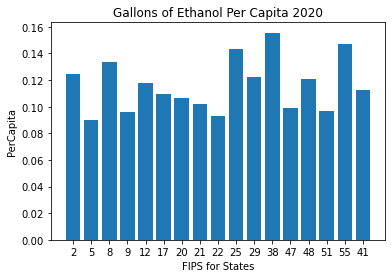

In [103]:
#bar chart for gallons of ethanol per state
plt.bar(df20['FIPS'],df20['PerCapita'])
plt.xlabel("FIPS for States")
plt.ylabel("PerCapita")
plt.title("Gallons of Ethanol Per Capita 2020")

In [111]:
#clean df w conditionals
#combining all the dataframes into one clean dataframe
clean_alc1 = pd.merge(df17, df18, how='outer')
clean_alc2 = pd.merge(df19, df20, how='outer')
new_clean_alc = pd.merge(clean_alc1, clean_alc2, how='outer')

#final clean dataframe
new_clean_alc.head()
new_clean_alc.set_index(['Year','FIPS'])

Month  Beverage   Gallons  Ethanol  Population  PerCapita
Year FIPS                                                           
2017 2         1         1    103645    42598      593378     0.0718
     5         1         1    402885   165586     2455022     0.0674
     8         1         1    733857   301615     4634346     0.0651
     9         1         1    412100   169373     3015481     0.0562
     12        1         1   2770686  1138752    17722275     0.0643
...          ...       ...       ...      ...         ...        ...
2020 25        7         3  11251830   506332     5862386     0.0864
     29        7         3  12167060   547518     5077875     0.1078
     38        7         3   2108602    94887      617880     0.1536
     41        7         3   8860090   398704     3547474     0.1124
     47        7         3  11436086   514624     5661532     0.0909

[1302 rows x 6 columns]

In [107]:
#copy of dataframe for merging
alc_df = new_clean_alc.copy()
covid_df = hopkins_df.copy()

#combo_df = pd.concat(covid_df,alc_df, how='outer')

In [99]:
#line graph for seperate year dataframes
# seven_values = plt.plot(df17['FIPS'],df17['PerCapita'])

#combo_df = pd.merge(new_clean_alc, hopkins_df)

In [62]:
fips_df = pd.read_csv('https://query.data.world/s/xtfryalulgzquqq4vqywjpulvl7c7z')
#fips_df.head()
del fips_df['STUSAB'], fips_df['STATENS']
fips_df.head()
new_fips_df = fips_df.rename(columns={"STATE_FIPS": "FIPS", "STATE_NAME":"State"})
new_fips_df.head()

,FIPS,State
0,1,Alabama
1,2,Alaska
2,4,Arizona
3,5,Arkansas
4,6,California
